# Aufgabe 2

Alfredo - stolzer Besitzer der Pizzeria Bella Capri - möchte seine Prozesse verbessern. Zum Beispiel:

 1. möchte er abschätzen können, wie viele Pizzas, wie viel frischen Salat und wie viele Nudeln er pro Tag benötigt. 
 2. Desweiteren möchte er gerne abschätzen, was er an verschiedenen Getränken besorgen muss.
 3. Da die Zahl der täglichen Gäste vermutlich schwer genau vorherzusagen ist überlegt er, ob es wohl einen (linearen) Zusammenhang 
    zwischen den Vorab-Reservierungen und der Gesamtzahl der Gäste pro Tag gibt, so dass er Anhand der Reservierungen eine Vorhersage 
    über die zu erwartende Gesamtzahl der Gäste treffen kann.
 4. Außerdem möchte er entscheiden, an welchem Tag er zukünftig Ruhetag machen soll.

Dazu erstellt er über einen Monat hinweg die Tabelle "BellaCapri.xlsx" und hofft dass er einen Datenanalysten findet, der ihm seine 
Fragen mit Hilfe eines Computerprogramms beantworten kann.

Können Sie Alfredo helfen und ihm ein paar nützliche Analysen und Graphiken mit Hilfe von Pandas, NumPy und Matplotlib erstellen?

Hinweis: die Aufgabe lässt Gestaltungsspielraum. Ich bin gespannt auf ihre individuellen Lösungen.

Quelldatei:

BellaCapri.xlsx

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## Food

### Load Data

Excel file has two sheets, 'Gerichte' is the one for food. Date can be used as index.

In [2]:
food = pd.read_excel('BellaCapri.xlsx', sheet_name='Gerichte', index_col='Datum')

### Get Basic Understanding

Check what the data looks like and if it's complete.
What are the relvant columns?
How can the data be sturctured?

1. Check basic information
2. Take a look at the dataframe
3. Plot data

#### Basic Information

In [3]:
display(food.info())

<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, 01.02.21 to 28.03.21
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Wochentag       56 non-null     object
 1   Reservierungen  56 non-null     int64 
 2   Besucher        56 non-null     int64 
 3   Pizza           56 non-null     int64 
 4   Pasta           56 non-null     int64 
 5   Salat           56 non-null     int64 
 6   Vorspeise       56 non-null     int64 
 7   Sonstiges       56 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 3.9+ KB


None

- DataFrame has 56 entires from 01.02 to 28.03 and is complete. No NaNs so no pre proccessing needed.
- important columns are 'Resiervierungen' and 'Besucher'. They will be used to check for a linear connection.
- there are more columns for the food then were references in the task description. Fokus is on 'Pizza', 'Pasta' and 'Salat'

Drop 'Vorspeise' and 'Sonstiges'

In [4]:
food = food.drop(['Vorspeise', 'Sonstiges'], axis=1)
display(food.head())

,Wochentag,Reservierungen,Besucher,Pizza,Pasta,Salat
Datum,,,,,,
01.02.21,Mo,10,127,56,32,23
02.02.21,Di,10,71,33,15,12
03.02.21,Mi,14,153,55,41,30
04.02.21,Do,16,226,82,53,47
05.02.21,Fr,27,299,115,76,60


### DataFrame

In [5]:
display(food.head(8))

,Wochentag,Reservierungen,Besucher,Pizza,Pasta,Salat
Datum,,,,,,
01.02.21,Mo,10,127,56,32,23
02.02.21,Di,10,71,33,15,12
03.02.21,Mi,14,153,55,41,30
04.02.21,Do,16,226,82,53,47
05.02.21,Fr,27,299,115,76,60
06.02.21,Sa,29,415,167,102,80
07.02.21,So,25,231,90,53,43
08.02.21,Mo,10,135,60,35,26


- data available for the whole week

#### Simple Plot of the relevant Data

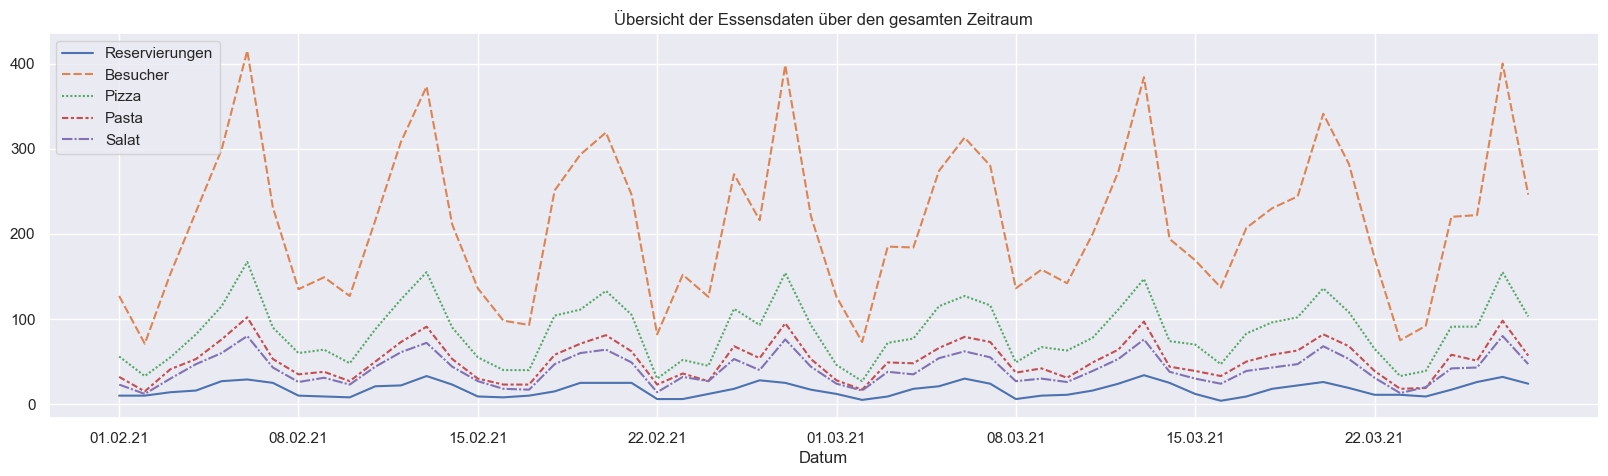

In [6]:
# set figure size
sns.set(rc = {'figure.figsize':(20, 5)})

# create plot
food_over_time = sns.lineplot(data=food)

# set title
food_over_time.set_title("Übersicht der Essensdaten über den gesamten Zeitraum")

# set clear ticks
week_starts = list(food.index[::7])
food_over_time.set_xticks(week_starts); # set ticks
food_over_time.set_xticklabels(week_starts); # set labels

- dependence between customers and food is obvious
- dependence between reservations and customers seems to be existent to some extent
- further analysis on the matter has to be done to decide

### Analyse Dependence between Customers and Main Dishes

1. Check
2. Take a look at the dataframe
3. Plot data

In [7]:
display(food.columns)

Index(['Wochentag', 'Reservierungen', 'Besucher', 'Pizza', 'Pasta', 'Salat'], dtype='object')

AttributeError: 'FacetGrid' object has no attribute 'set_title'

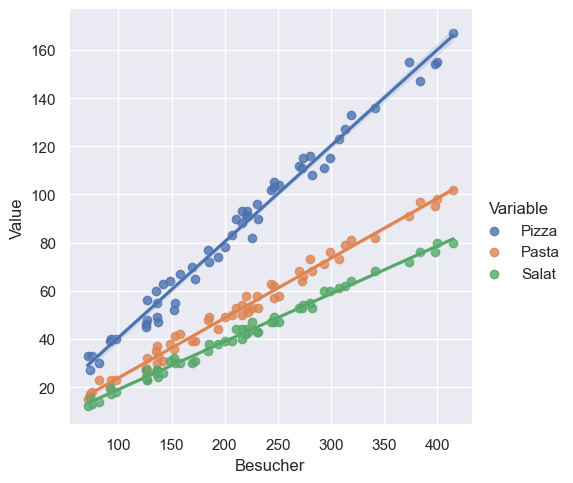

In [11]:
# restructure data for plotting
food_long = food.drop(['Wochentag', 'Reservierungen'], axis=1)
food_long = food_long.melt(id_vars='Besucher', var_name='Variable', value_name='Value')

# plot
food_over_customers = sns.lmplot(data=food_long, x='Besucher', y='Value', hue='Variable')

# set title
food_over_customers.set_title("Zusammenhang zwischen der Anzahl der Hauptgerichten und der Besucherzahl");